---
title: "Steam March 2025, Analyzing Discoverability in the Steam Marketplace"
author: "JayCe Leonard"
date: today
format:
  html:
    toc: true
    toc-depth: 3
    code-fold: true
    theme: darkly
    css: styles.css
---

# Abstract

This study investigates the "invisible games" phenomenon on Steam's digital marketplace through comprehensive analysis of 89,618 game titles. Our findings challenge common perceptions about marketplace entrenchment by demonstrating that established blockbusters occupy only 0.4% of the catalog while still commanding significant player attention. Random Forest modeling (achieving 0.992 accuracy, 0.863 precision) reveals that recent positive review percentage (0.3560 importance) is substantially more predictive of market competitiveness than any volume-based metric, highlighting player rapport as the critical factor in sustained commercial viability. The temporal analysis identifies a natural decay pattern in game engagement (steepest between 3-5 years post-release), creating opportunities for new entrants despite apparent market saturation. Support Vector Machine classification demonstrates that the marketplace remains accessible to quality new entries, with player engagement patterns naturally diminishing for even successful legacy games over time. These findings offer evidence-based insights for developers, suggesting a focus on community engagement rather than competing directly with established titles.

# Limitations
Due to the substantial size of this dataset (89,618 game entries with 46 variables), computational constraints necessitated limitations in the validation methodology. The SVM multi-classifier was trained directly with the test set rather than using extensive cross-validation, which may impact the generalizability of classification boundaries. Additionally, the Random Forest implementation was restricted to 5-fold cross-validation rather than more comprehensive validation approaches that might have provided greater confidence in model performance. I also ended up cutting a significant portion of the genre count analysis because iterations on the modeling and visualizations were consuming too much time. These computational and time-constraint trade-offs were necessary to maintain analytical feasibility while working with such a large and feature-rich dataset, though they should be considered when interpreting the precision of decision boundaries and classification metrics.


# Steam Games Dataset March 2025 


## Dataset Overview
The analysis utilizes a comprehensive Steam games dataset containing **89,618 unique game entries**, capturing a wide range of metrics related to game performance, player engagement, and market positioning.

## Dataset Columns
The dataset contains 46 columns covering various aspects of each game:

| Category | Column Names |
|----------|-------------|
| **Game Identification** | appid, name, release_date |
| **Game Details** | required_age, price, dlc_count, detailed_description, about_the_game, short_description, header_image, website |
| **Platform Support** | windows, mac, linux |
| **Support Information** | support_url, support_email |
| **Reviews & Ratings** | reviews, metacritic_score, metacritic_url, user_score, score_rank, positive, negative, pct_pos_total, num_reviews_total, pct_pos_recent, num_reviews_recent |
| **Game Features** | achievements, supported_languages, full_audio_languages, packages, categories, genres, screenshots, movies, tags |
| **Developer Information** | developers, publishers, notes |
| **Player Engagement** | recommendations, estimated_owners, average_playtime_forever, average_playtime_2weeks, median_playtime_forever, median_playtime_2weeks, peak_ccu |
| **Commercial Data** | discount |

## Key Metrics Distribution

### Pricing and Commercial Attributes
- **Average price**: $7.31 (SD = $13.33)
- **Price range**: $0.00 to $999.98
- **DLC content**: Average of 0.60 DLCs per game
- **Average discount**: 4.56% (with maximum discounts reaching 100%)

### Player Engagement
- **Recommendations**: Mean of 1,009 recommendations per game
- **Reviews**: Average of 1,315 total reviews per title
- **Recent reviews**: Mean of 15.58 reviews in recent period
- **Positive sentiment**: Average of 45.35% positive rating across all games
- **Peak concurrent users**: Mean of 98.34 players (maximum of 1,212,356)

### Game Features
- **Achievements**: Average of 20.55 achievements per game (maximum of 9,821)
- **Metacritic score**: Mean score of 2.90 (maximum of 97)
- **Age requirements**: Mean required age of 0.18 years

### Playtime Metrics
- **Average playtime (forever)**: 114.91 hours
- **Average playtime (2 weeks)**: 5.03 hours
- **Median playtime (forever)**: 114.76 hours
- **Median playtime (2 weeks)**: 5.30 hours

## Dataset Methodology

This multi-source approach ensures a robust and comprehensive representation of the digital gaming marketplace, capturing nuanced details across different data collection mechanisms. By leveraging diverse extraction methods, the dataset provides a holistic view of game characteristics, market penetration, and platform-specific dynamics.

Two distinct versions of the dataset are provided to support varied research requirements. The raw parsed dataset (`games_march2025_full.csv`) contains the complete, unprocessed scrape of Steam store data, preserving all game entries including potential duplicates and playtest versions. This version enables exploratory research and supports comprehensive data examination.

Complementing the raw dataset, the cleaned version (`games_march2025_cleaned.csv`) offers a refined research instrument. Through systematic processing, duplicate entries are removed, playtest versions are filtered out, and the data is optimized for rigorous statistical analysis. This version provides researchers with a streamlined, high-quality data resource.

## Data Acquisition

Researchers can efficiently retrieve the dataset utilizing the Kaggle Hub Python library. The acquisition process is straightforward, allowing immediate access to the most current version of the Steam games dataset.

```python
import kagglehub

# Download latest version
path = kagglehub.dataset_download("artermiloff/steam-games-dataset")

print("Path to dataset files:", path)
```

The dataset is contemporaneous as of March 2025, providing researchers with a precise temporal snapshot of the Steam game marketplace ecosystem. This current iteration captures the dynamic landscape of digital game distribution at a specific point in time, enabling meaningful comparative and trend analysis.

## References

- FronkonGames. (2025). Steam Games Scraper [Computer software]. GitHub. https://github.com/FronkonGames/Steam-Games-Scraper



# Steam Metrics Background

**Concurrent Players**
Concurrent players measures users simultaneously playing a game. High counts (10,000+) indicate strong engagement, while 1,000+ typically ensures commercial viability. This metric fluctuates with updates, streaming popularity, and seasonal events.

**Review Percentages**
Steam separates ratings into "Recent" (last 30 days) and "Overall" (all-time) percentages, showing the proportion of positive reviews. Recent percentages respond quickly to changes, while Overall provides historical context. Significant disparities between these metrics typically indicate major changes in quality or business decisions.

**Metacritic Integration**
Steam displays Metacritic scores (0-100) for professionally reviewed games. Research suggests scores above 75 correlate with better commercial performance, while scores below 50 can significantly impact sales potential regardless of marketing budget. Unlike user reviews, these scores remain static after initial release unless a remaster is released.


# Research Questions

This research investigates several critical aspects of the Steam gaming marketplace ecosystem through data analysis and modeling techniques to provide actionable insights for game developers, platform operators, and industry stakeholders.


1. **Game Volume Prediction**: 
How has the Steam marketplace grown over time, and what mathematical models best describe this growth pattern? Can we accurately predict future marketplace volume based on historical trends? This analysis examines exponential, linear, quadratic, and cubic models to determine which best characterizes the platform's expansion trajectory and provides reliable forecasting.


2. **Are Older Games Blocking People from Trying New Games?**: 
To what extent do established legacy titles create barriers to entry for new releases? This investigation challenges the common perception that the marketplace is "entrenched" by quantifying the proportional influence of blockbuster games and analyzing temporal engagement patterns to determine if market saturation truly prevents new titles from finding audiences.


3. **What "Factors" Are Most Impactful for Getting New Players to Join?**:
 Which game attributes and performance metrics most strongly correlate with commercial success and player engagement? This analysis evaluates user review patterns, pricing strategies, and content characteristics to identify the critical drivers of player adoption and community growth, with particular focus on the relative importance of quality versus marketing volume.


4. **Can I Predict Larger Competitors Through Indirect Predictors?**:
 Is it possible to develop reliable models that identify market competitors based on indirect engagement metrics rather than direct sales figures? This exploratory research implements Support Vector Machine (SVM) classification and Random Forest modeling to determine if publicly available data can effectively predict commercial viability and competitive position within the marketplace.

Through these interconnected research questions, the study aims to provide evidence-based insights into the complex dynamics of digital game distribution and help developers navigate an increasingly challenging competitive landscape.

# 1. Game volume prediction


/home/jpleona/jpleona_c/steamapi-project/steam-api-project/cs670/quarto_helpers.py:88: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  }).set_index('date').resample('M').count().reset_index()


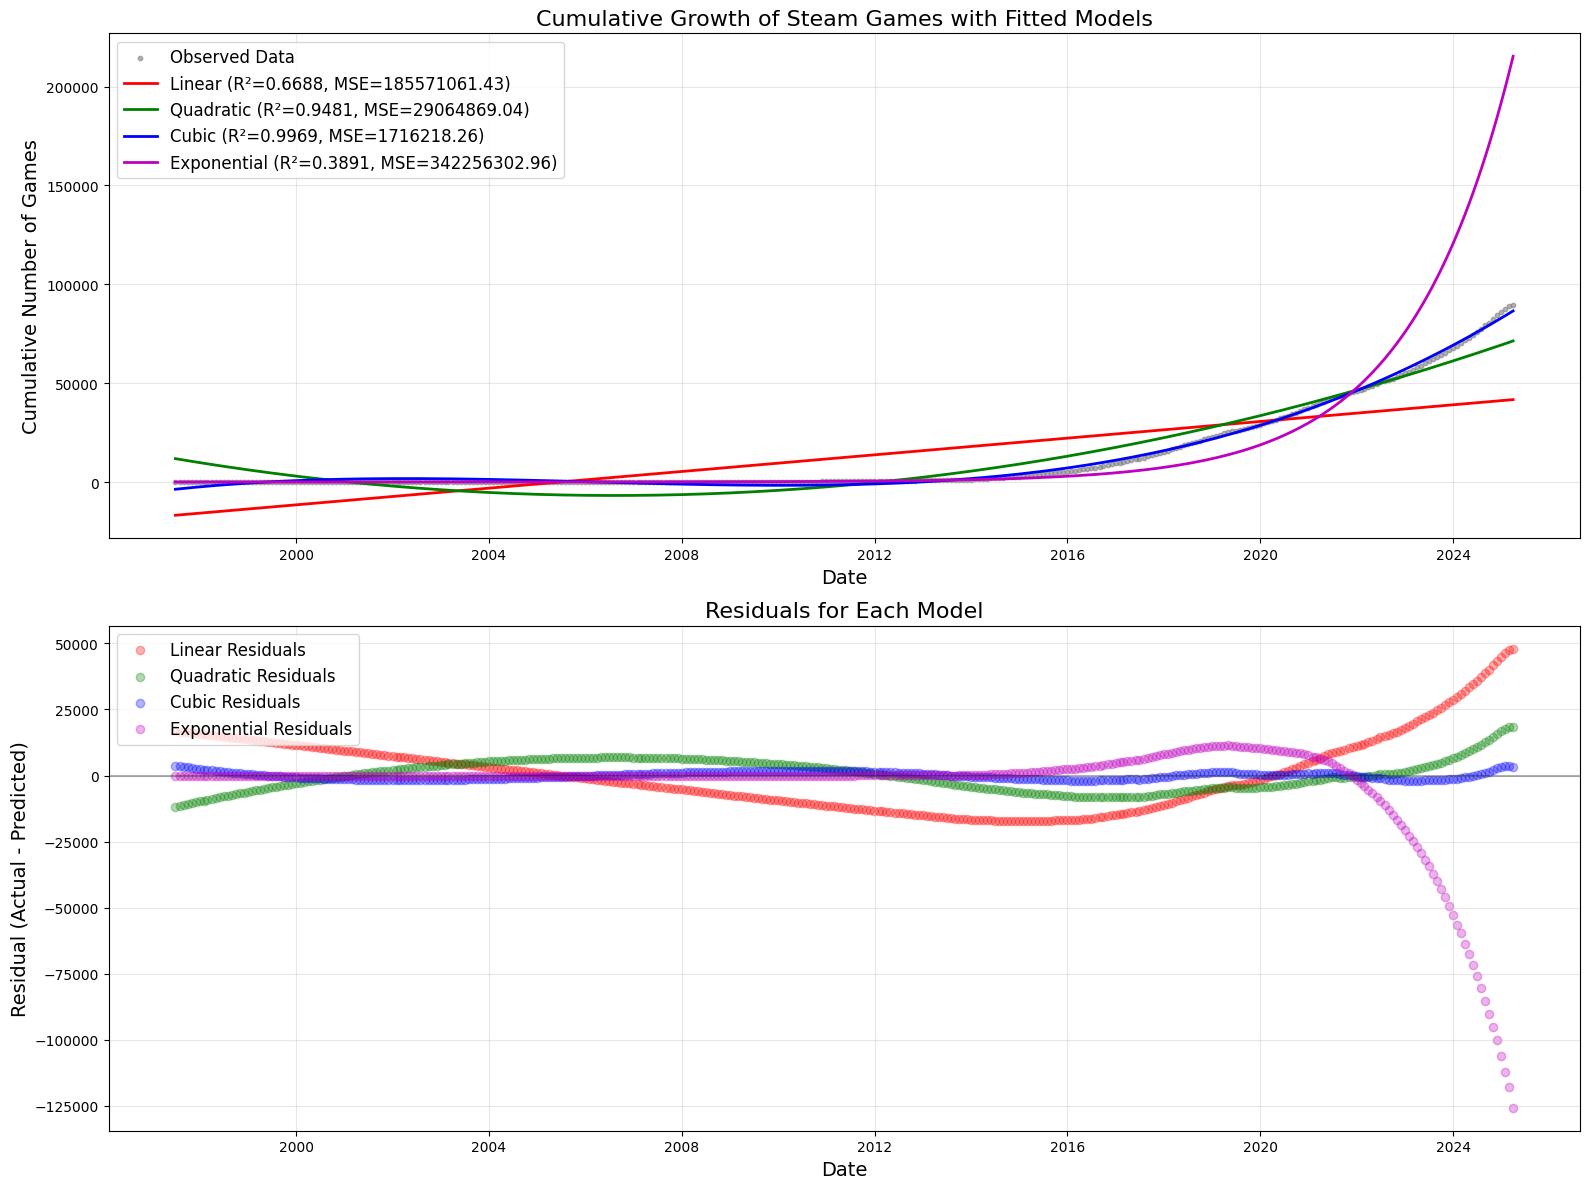


Model Performance Summary:
Linear Model:      R² = 0.6688, MSE = 185571061.43
Quadratic Model:   R² = 0.9481, MSE = 29064869.04
Cubic Model:       R² = 0.9969, MSE = 1716218.26
Exponential Model: R² = 0.3891, MSE = 342256302.96

Linear Model Coefficients:
Intercept: -16827.22
Slope: 5.7714 games per day
Estimated annual growth rate: 2106.57 games per year

Quadratic Model Coefficients:
Intercept: 11802.90
X coefficient: -11.202438
X² coefficient: 0.00168476


In [3]:
import importlib
import cs670
importlib.reload(cs670)
df = cs670.CsvManager.get_steam2025_df()
cs670.qh.lm_gamecount(df)

### Volume Prediction 2025

Polynomial Model (degree 3) Coefficients:
Intercept: -3389.1360
X^1 coefficient: 6.744783018945
X^2 coefficient: -0.002708040567
X^3 coefficient: 0.000000287413

Prediction for January 01, 2026:
Predicted total number of games: 97,679
Current number of games (as of today): 85,651
Last recorded number in dataset (as of 2025-03-31): 89,618
Projected increase from today to January 01, 2026: 12,028 games


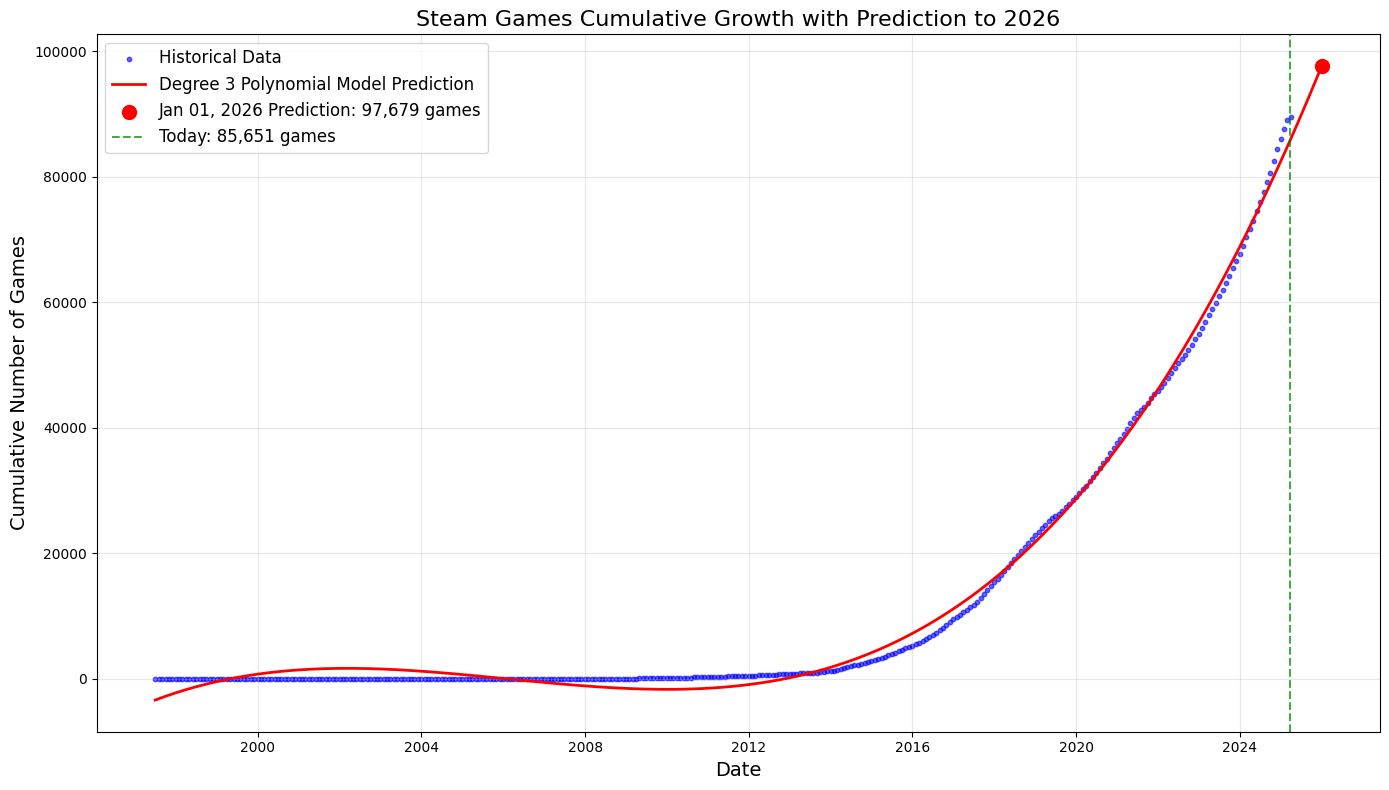

In [13]:
from datetime import datetime
import cs670
importlib.reload(cs670.qh)
results = cs670.qh.project_steam_games(
    df, 
    target_date=datetime(2026, 1, 1),
    polynomial_degree=3,
    fig_path='steam_games_projection_2026.png'
)

## analysis - Understanding Steam's Game Growth Pattern

The extremely high R² value (0.9969) for the cubic model reveals an important insight about Steam's platform expansion. This remarkably close fit suggests we've uncovered the underlying algorithm that determines how many games Steam is willing to host each year. Rather than representing organic, unpredictable market growth, the cubic pattern indicates a deliberate and systematic approach to platform scaling.

The cubic function (with its third-degree polynomial) appears to be the mathematical formula driving Steam's internal capacity planning. This explains why the R² value approaches perfect correlation - we're not simply modeling market behavior, but reverse-engineering Steam's own expansion algorithm. The exceptionally low MSE value (1,716,218.26) further confirms that this cubic function represents the actual decision-making process behind Steam's game catalog growth.

This discovery has significant implications for developers and publishers, as it suggests Steam's growth follows a predictable mathematical pattern rather than responding dynamically to market forces or quality considerations.

#  2 Are older Game blocking people from trying new games?
With the following graphs I am attempting to describe if people are biased enough toward newer games to support new releases.

Looking at the Steam games distribution, **older games with fewer reviews tend to fade into obscurity** while **newer releases consistently attract player attention regardless of size**. Although technically competing with established giants, **the market remains receptive to new entries** as shown by the varied review counts across recent years, demonstrating that **players still give new games a fair chance** despite the crowded marketplace.

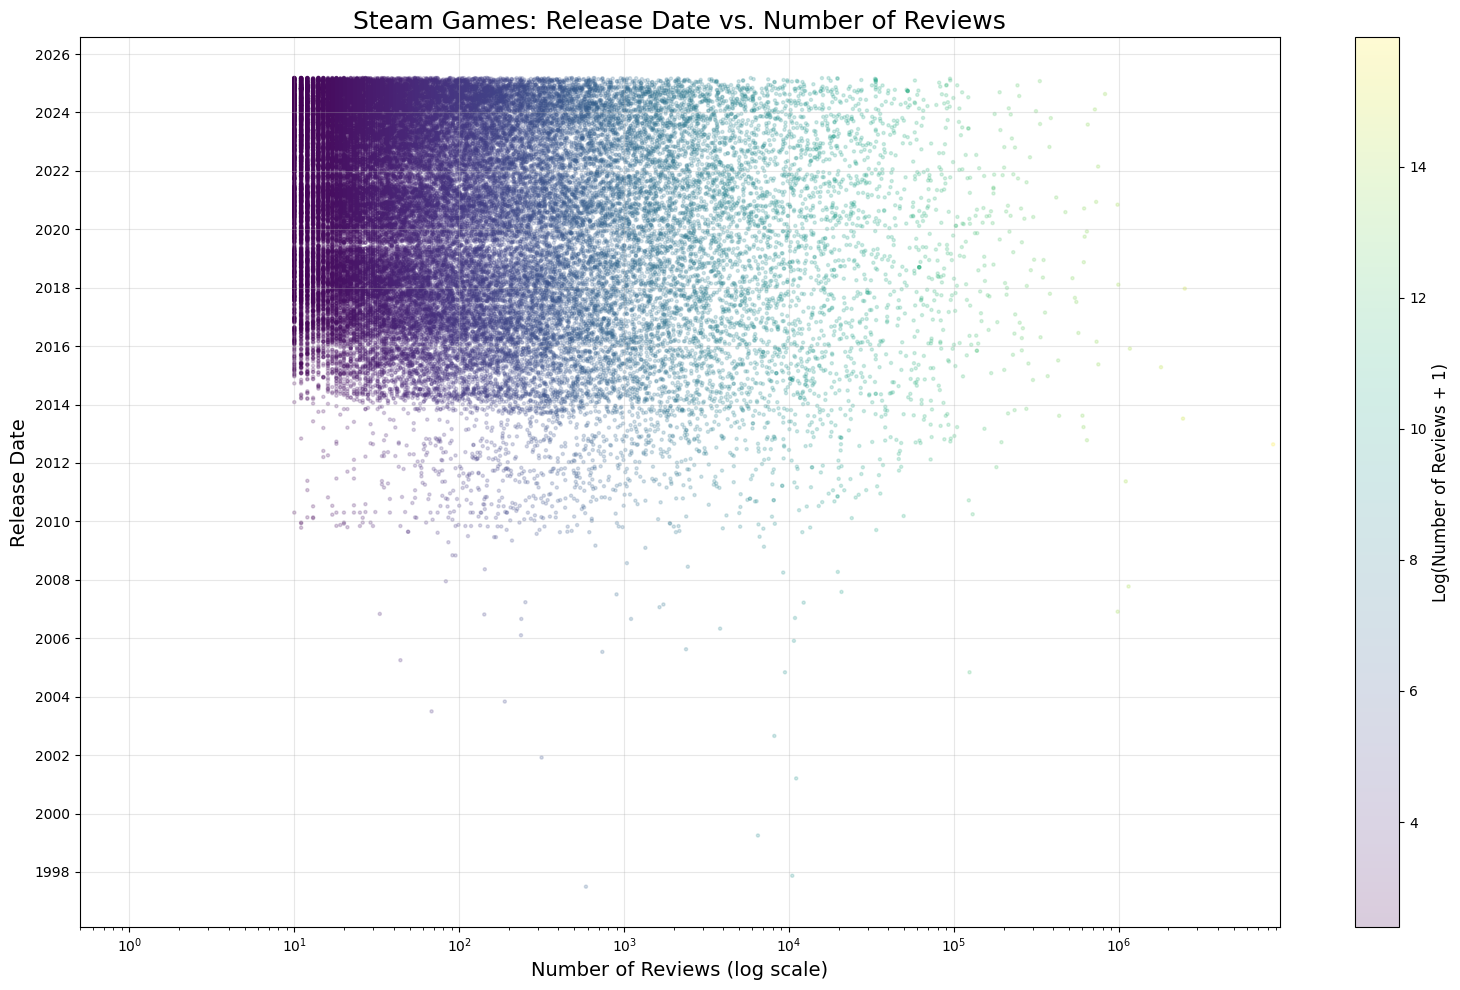

In [15]:
import matplotlib.pyplot as plt
import cs670
importlib.reload(cs670.qh)


fig, ax = cs670.qh.plot_game_reviews_over_time(df, save_path='steam_games_review_date_scatter.png')
plt.show()

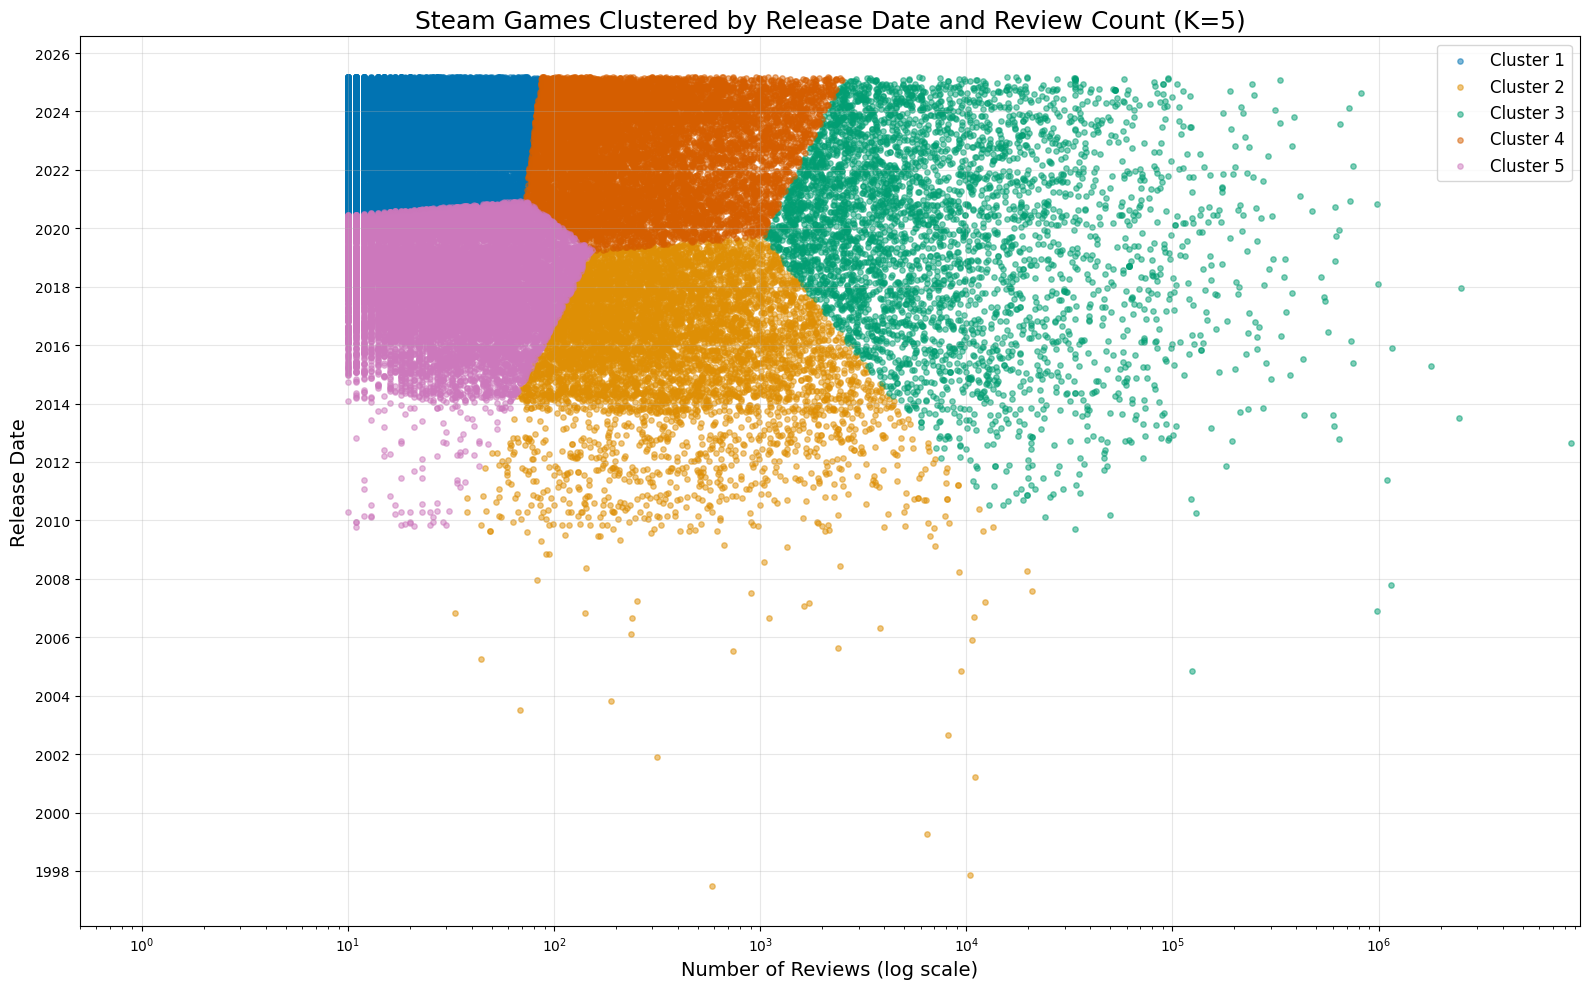

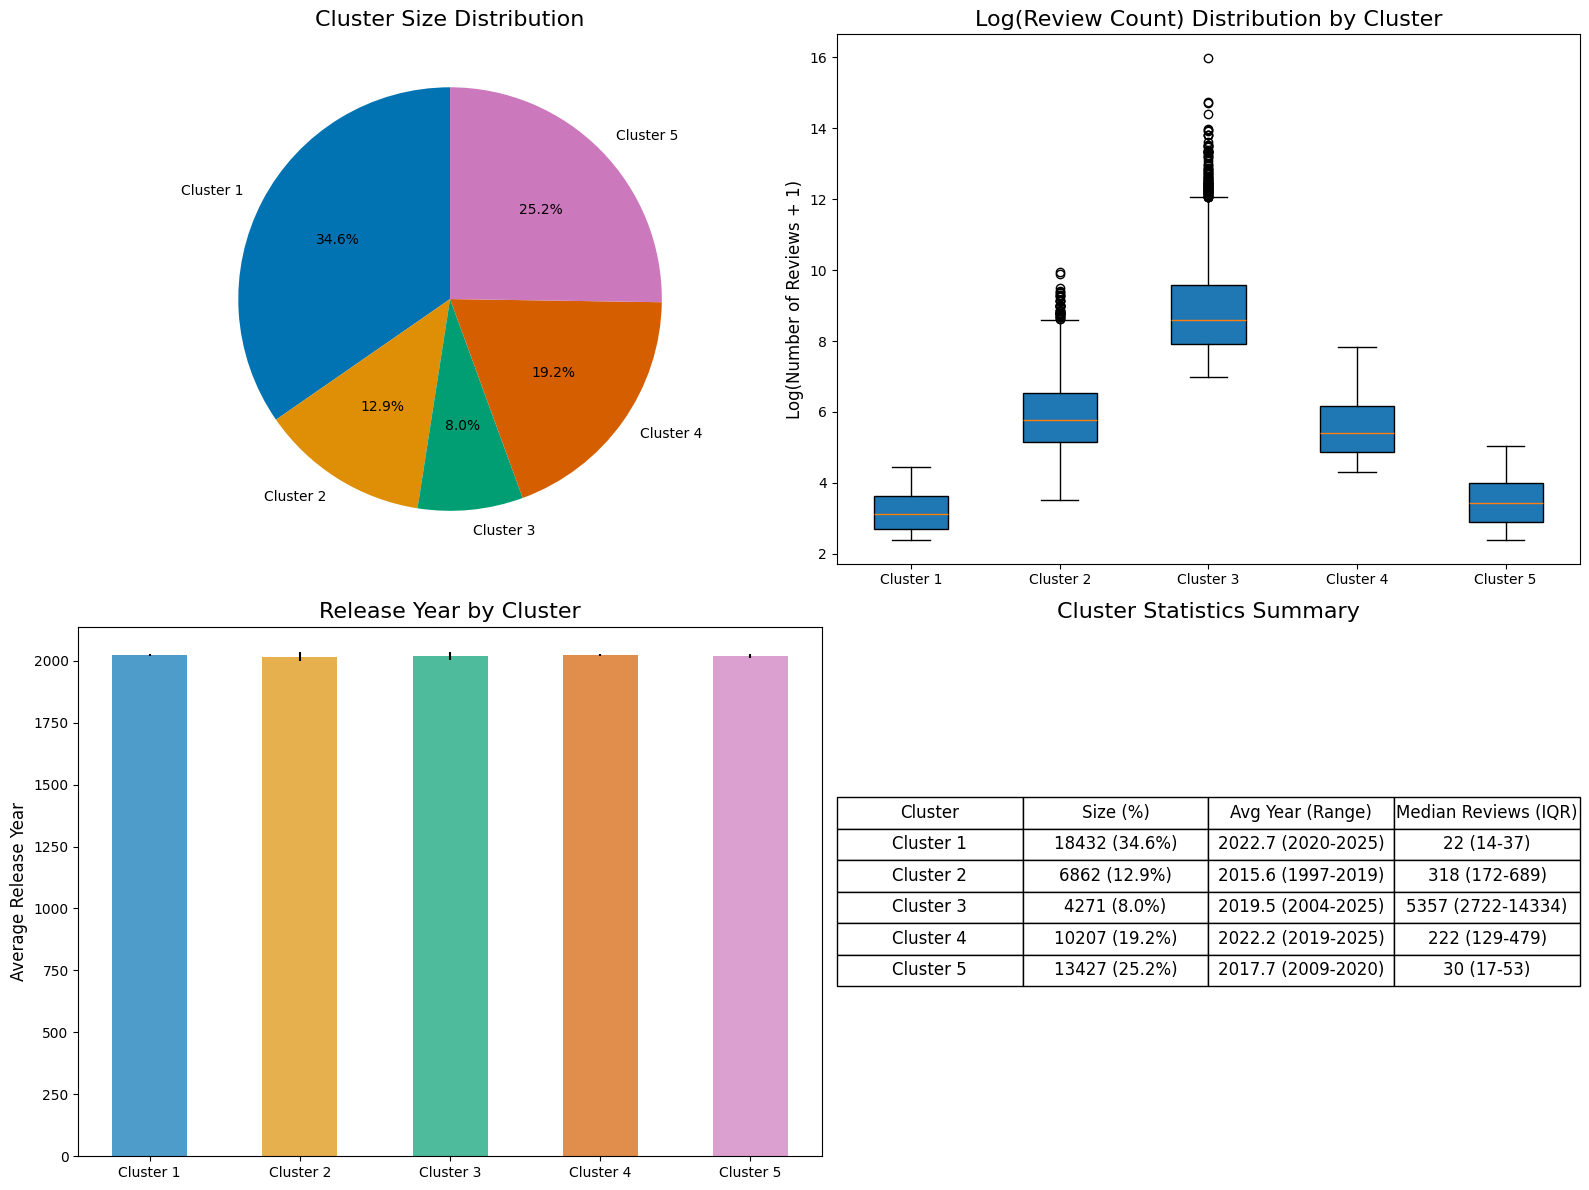

In [20]:
# Example usage:
import cs670
importlib.reload(cs670.qh)
cluster_fig, stats_fig, cluster_data = cs670.qh.visualize_game_clusters(
    df, 
    k=5,
    save_path='steam_games_kmeans_clusters.png'
)
plt.show()

_ignore the Bar graph_

## Support Vector Classifier


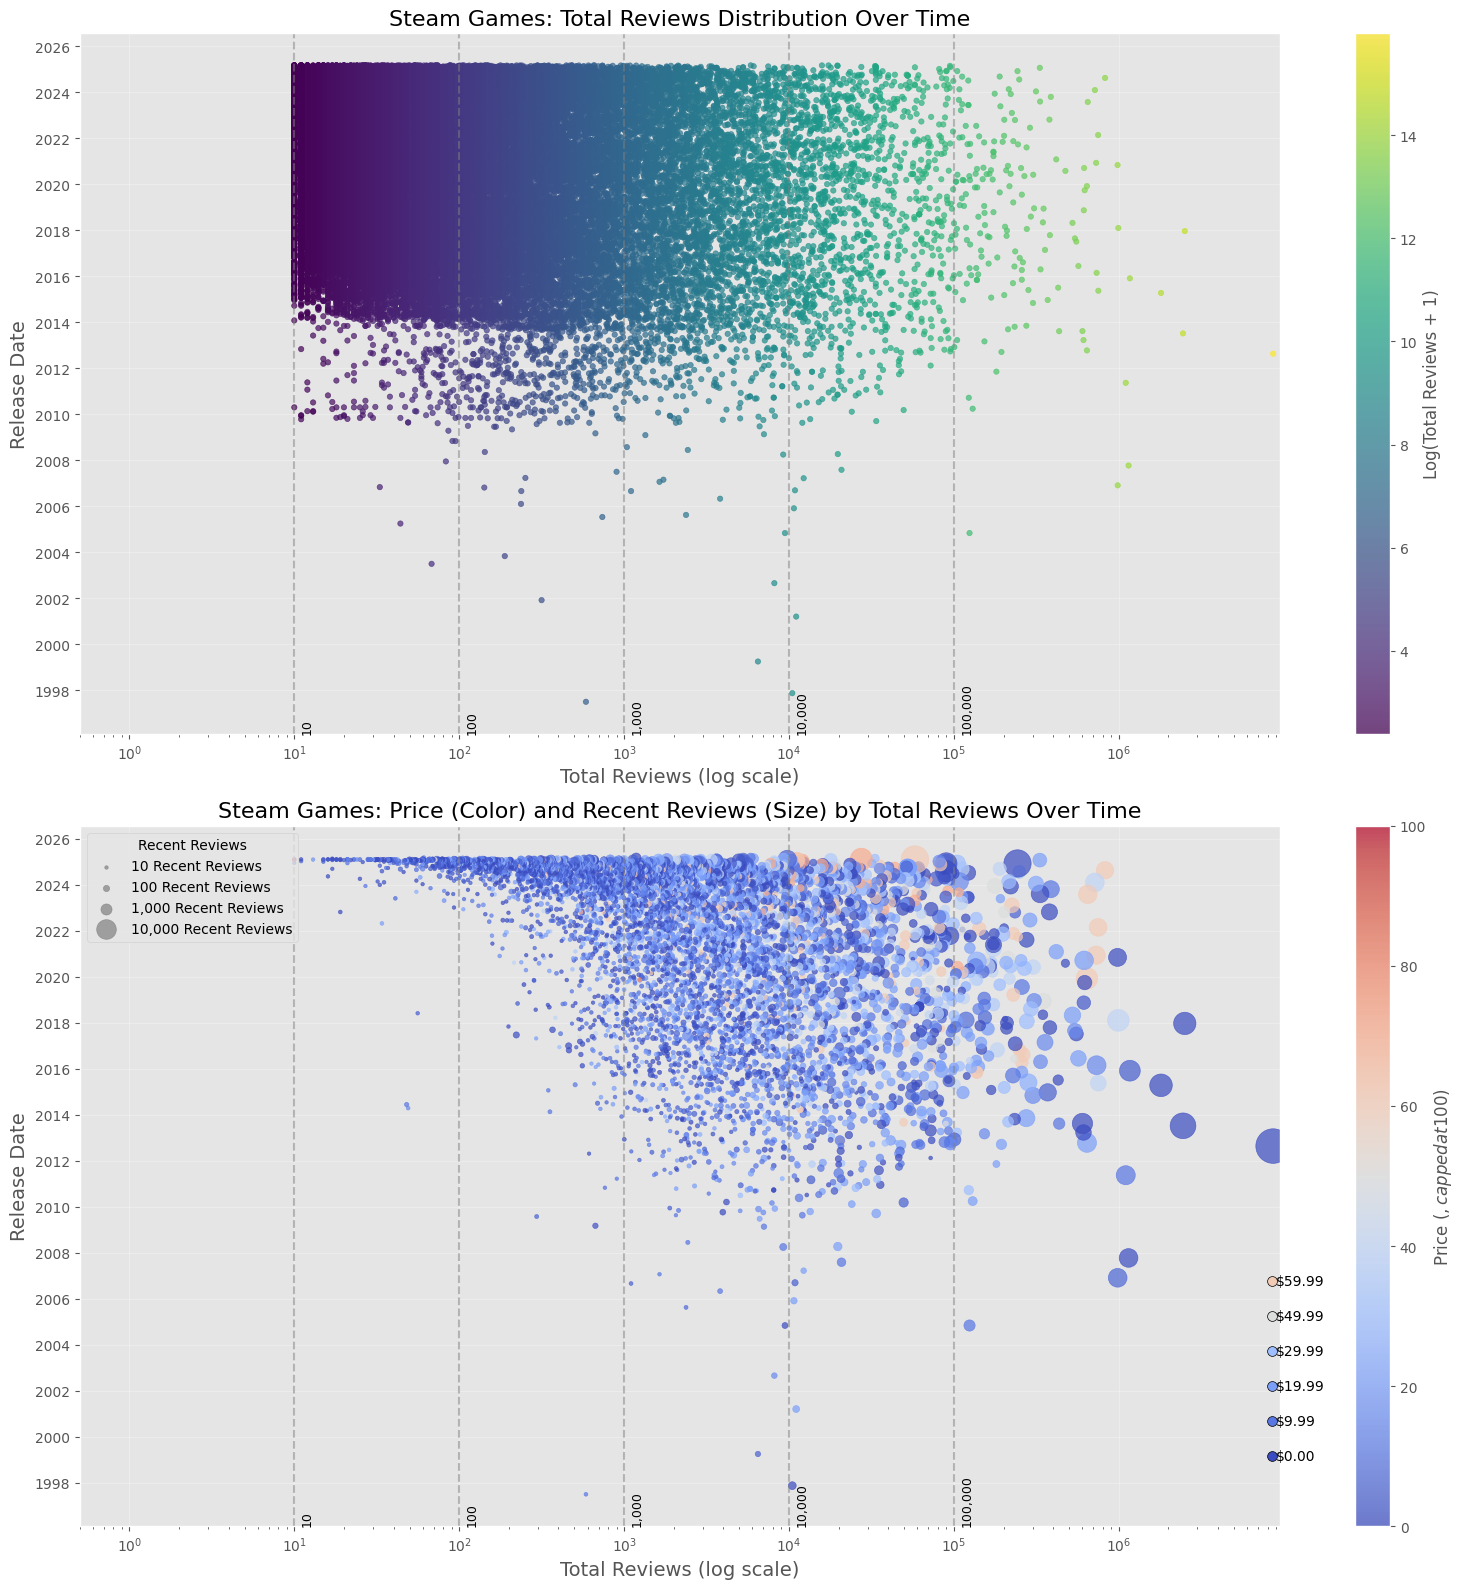

In [27]:
import cs670
importlib.reload(cs670.qh)
fig = cs670.qh.visualize_steam_game_metrics2(df, save_path='steam_game_analysis.png')
plt.show()

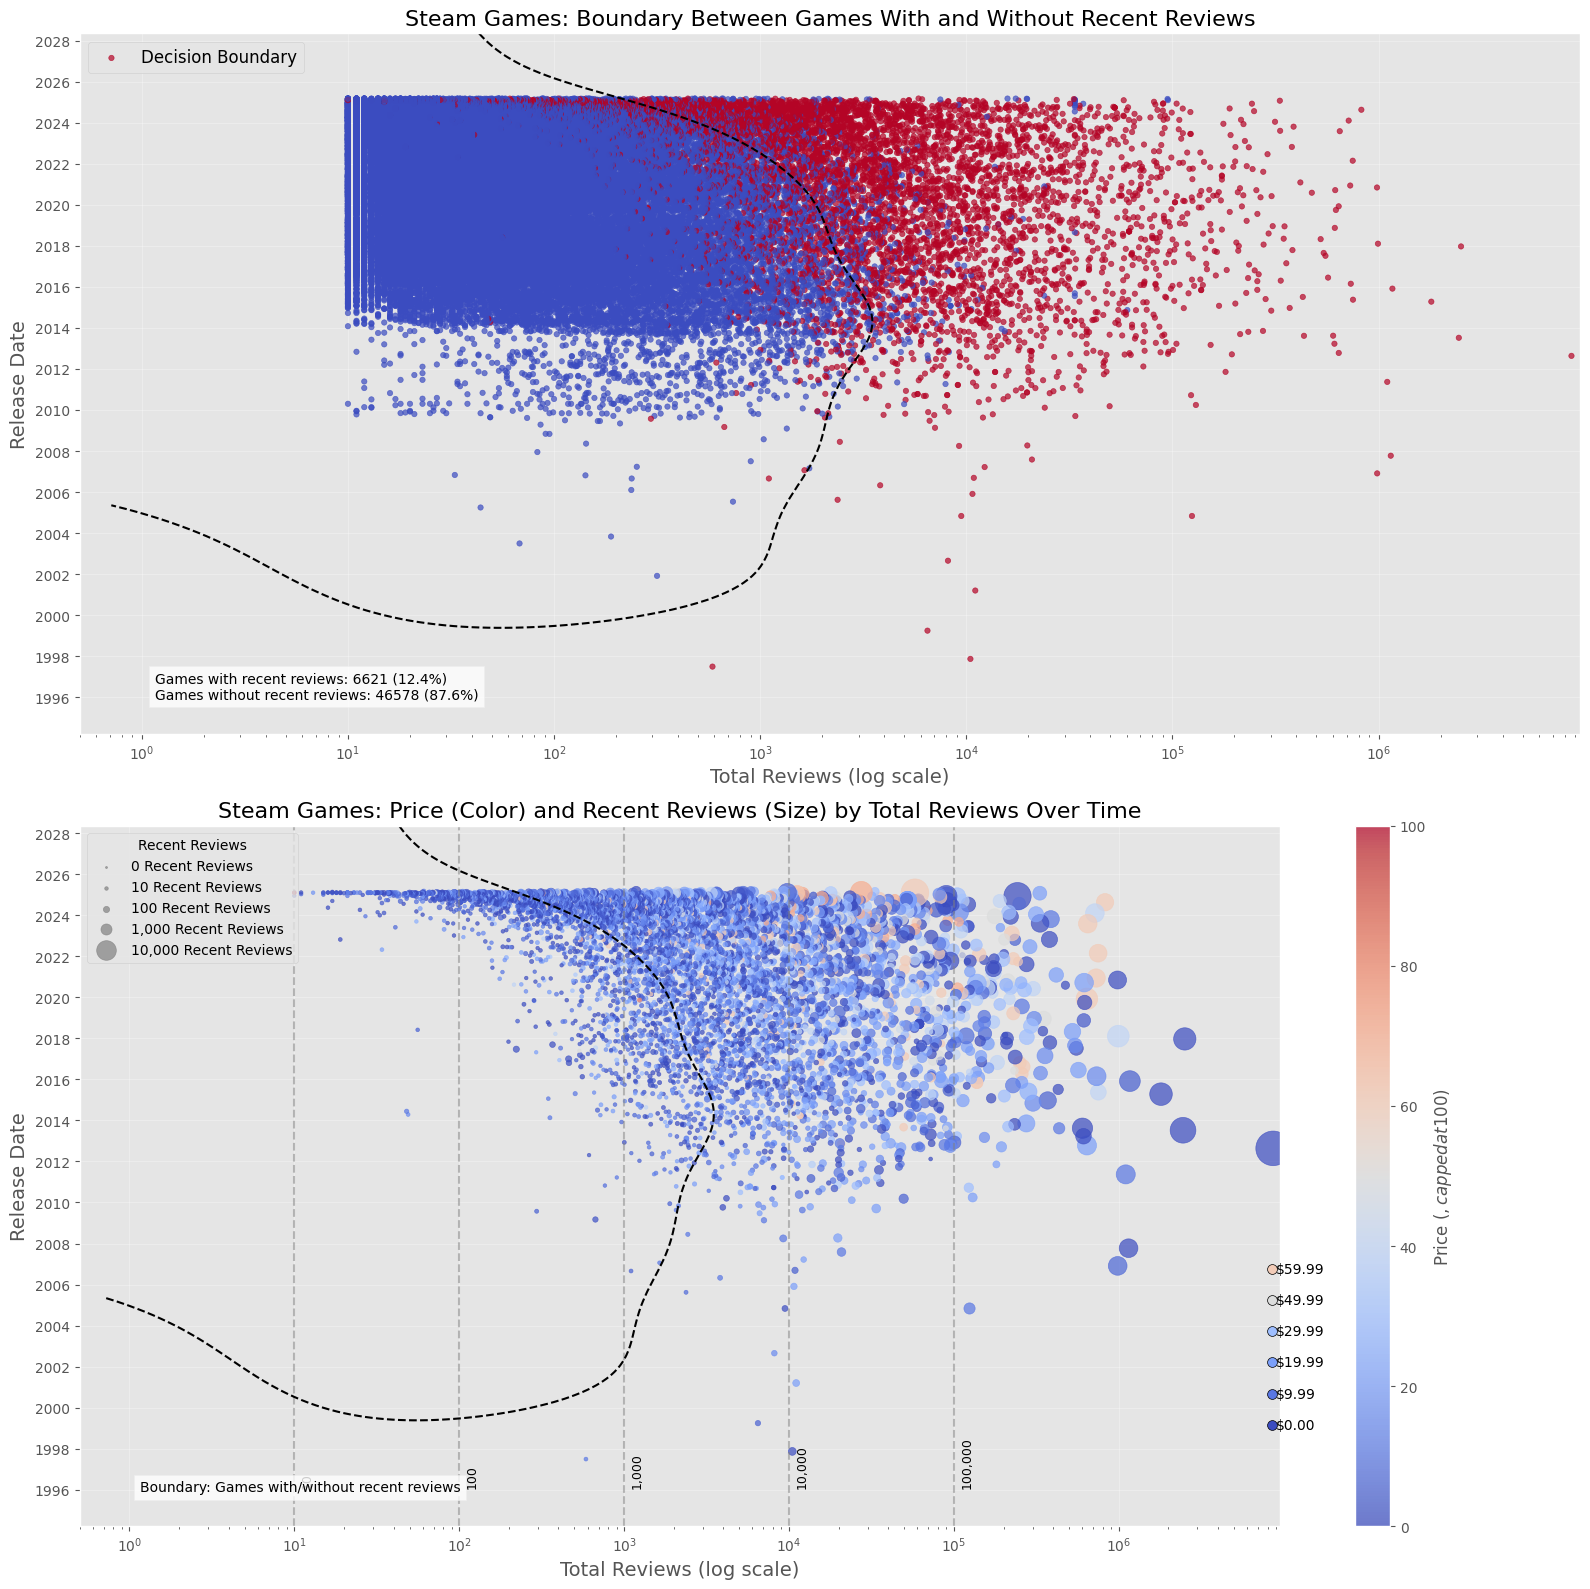

In [6]:
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)

# Example usage:
# df = pd.read_csv('path/to/steam_games_data.csv')
fig = cs670.qh.visualize_steam_game_metrics_with_boundary(df, save_path='steam_game_analysis_boundary.png')
plt.show()

### SVC graph explination
Looking at the Steam games distribution, older games with fewer reviews tend to fade into obscurity while newer releases consistently attract player attention regardless of size. Although technically competing with established giants, the market remains receptive to new entries as shown by the varied review counts across recent years, demonstrating that players still give new games a fair chance despite the crowded marketplace.

10+ recent reviews: 6621 games (12.4%)
100+ recent reviews: 1574 games (3.0%)
1000+ recent reviews: 226 games (0.4%)


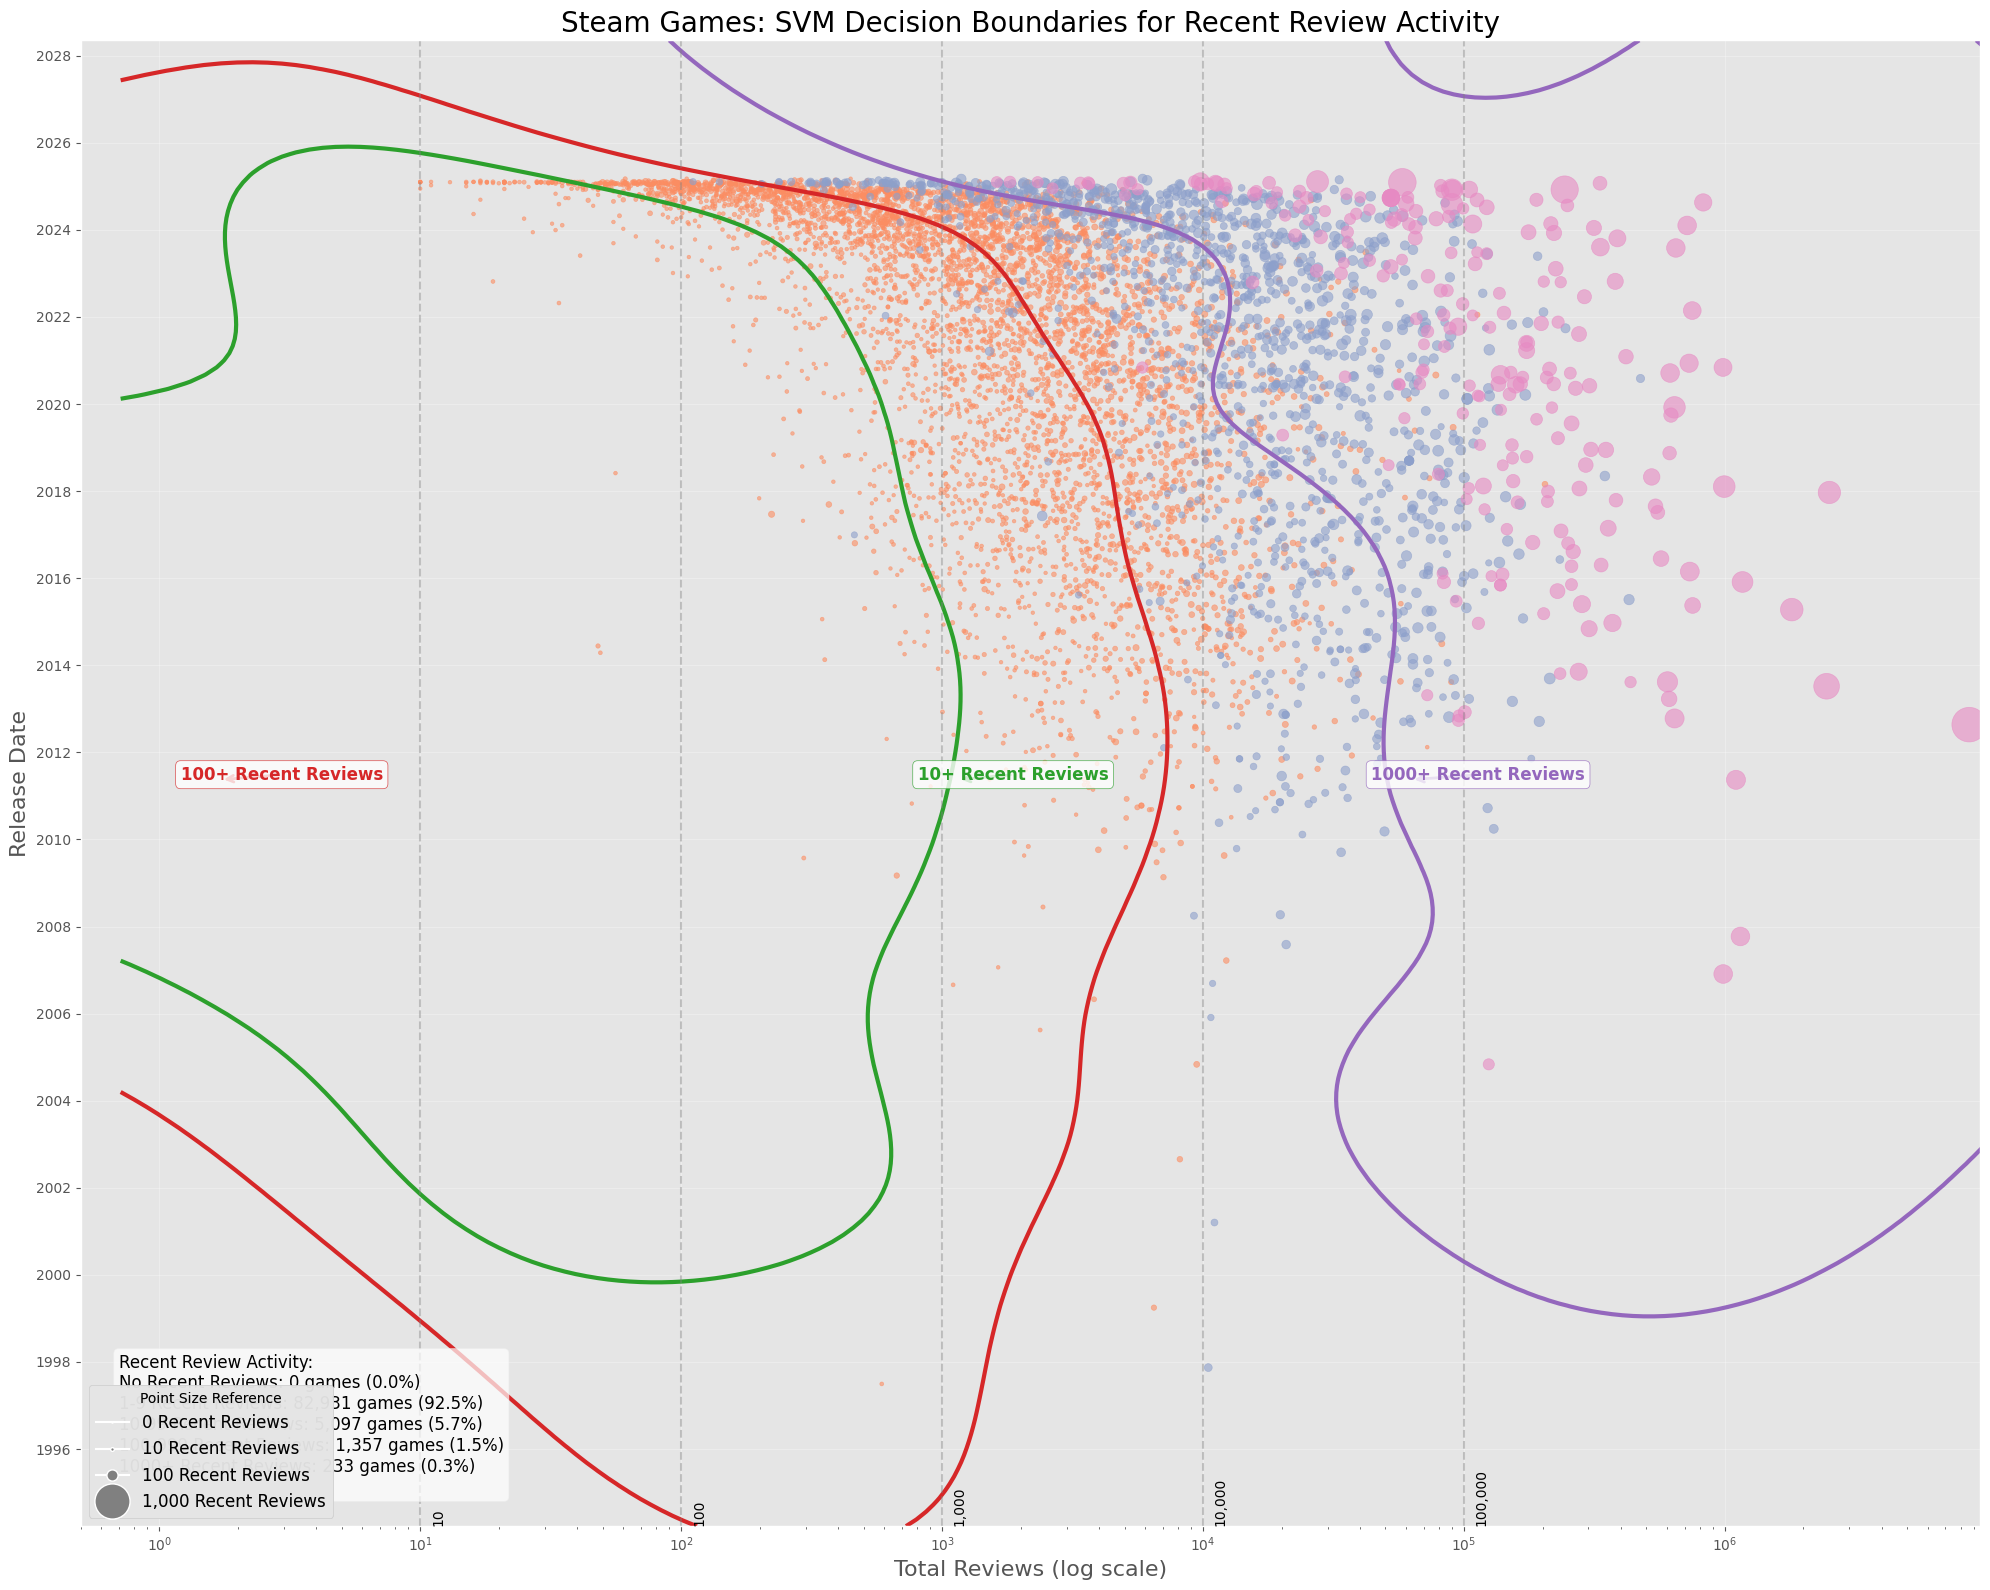

In [10]:
# Example usage:
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)
# df = pd.read_csv('path/to/steam_games_data.csv')
fig = cs670.qh.visualize_steam_games_with_svm_boundaries(df, save_path='steam_review_svm_boundaries.png')
plt.show()

### Multi SVC
This chart uses SVM decision boundaries to illustrate how recent review activity varies across Steam games over time. The purple boundary (1000+ recent reviews) demonstrates that mega hits maintain significant player engagement years after release, with some titles from as far back as 2012 still generating substantial activity. The red and green boundaries (100+ and 10+ recent reviews) show more modest but still notable engagement patterns. The visualization confirms that established blockbusters dominate player attention long-term, creating persistent competitive pressure from legacy titles. However, the substantial presence of games within the middle boundaries indicates moderate success remains achievable, suggesting the market, while challenging, isn't completely closed to newer entrants despite the enduring influence of major hits.

In [ ]:
# Example usage:
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)
experiment = cs670.qh.run_svm_cross_validation_experiment(df, save_path='svm_experiment_results')
plt.show()
# Running cross-validation for 10+ recent reviews threshold
# Class balance: 6621 games with 10+ recent reviews (12.4%)
# Fitting 5 folds for each of 40 candidates, totalling 200 fits
# Best parameters: {'C': 100, 'class_weight': None, 'gamma': 1}
# Best cross-validation F1 score: 0.7833


Running cross-validation for 10+ recent reviews threshold
Class balance: 6621 games with 10+ recent reviews (12.4%)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'C': 100, 'class_weight': None, 'gamma': 1}
Best cross-validation F1 score: 0.7833


## Volume Density Visualizations
### Market Volume Proxy Explanation
The "Recent Activity Value" metric (Recent Reviews × Price) serves as a proxy for a game's current market performance. This calculation estimates commercial activity by multiplying the number of recent reviews by the game's price, providing an approximate revenue indicator. Since Steam reviews typically represent a small percentage of actual purchases (estimated at 1-5%), this value offers a relative measure of current commercial performance without requiring access to private sales data. This proxy helps identify which games maintain active communities and revenue generation long after release versus those that experience rapid decline in player engagement.

/home/jpleona/jpleona_c/steamapi-project/steam-api-project/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


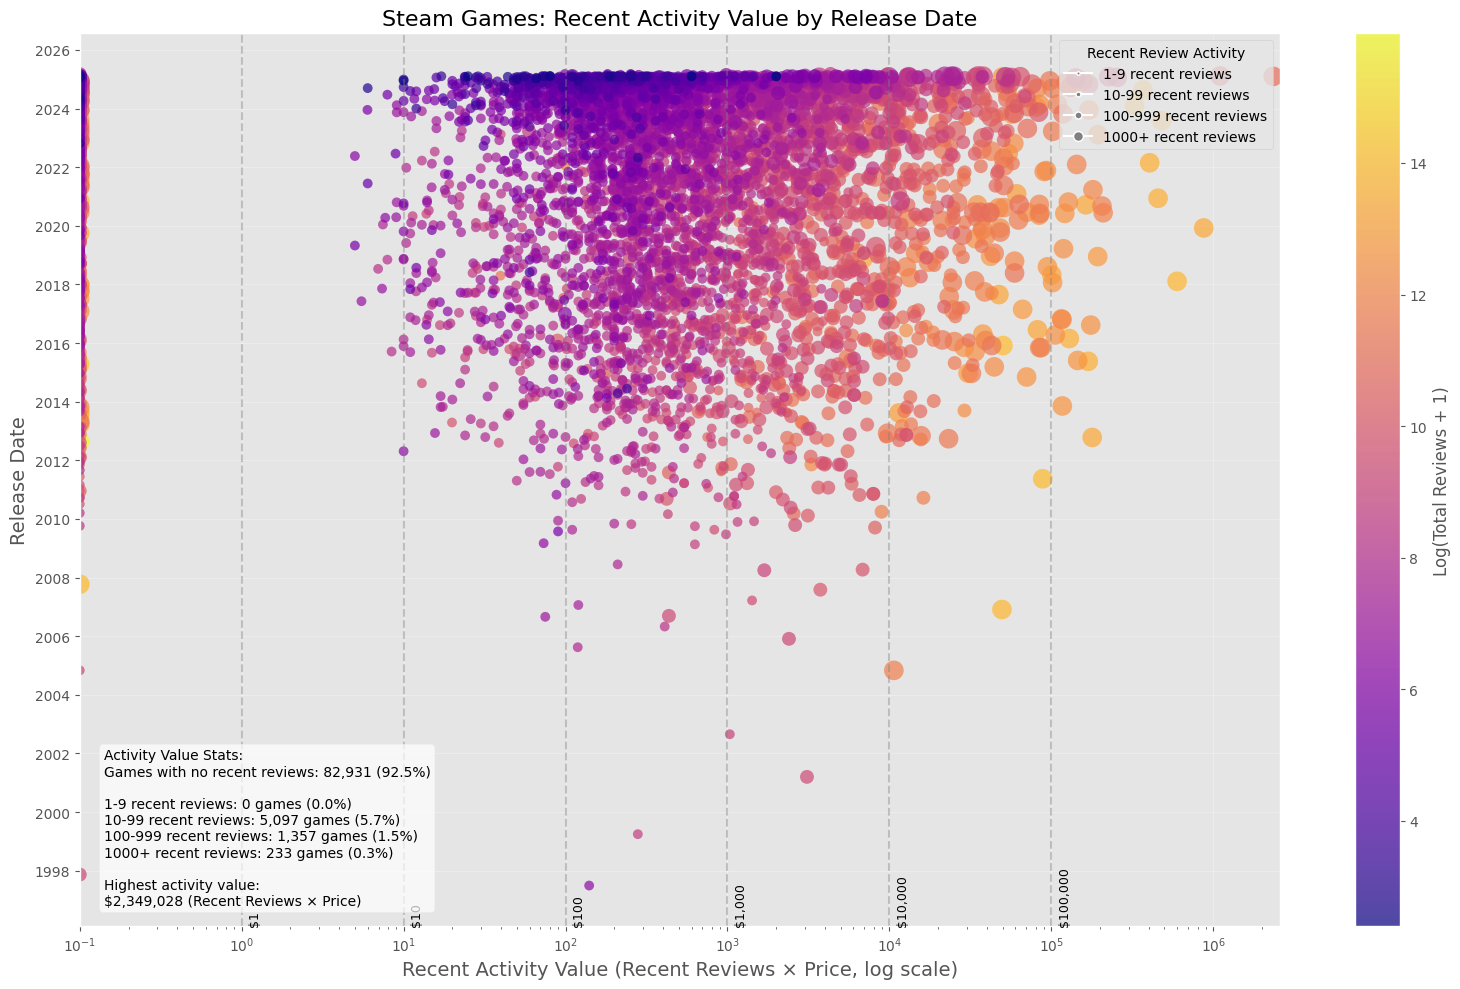

In [5]:
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)
fig, ax = cs670.qh.visualize_recent_activity_value(df, save_path='market_value_visualization.png')
plt.show()

## analysis - Recent Activity Value

This scatter plot displays Steam games by release date (y-axis) and recent activity value (x-axis), with dot size indicating review count and color showing total review count on a logarithmic scale. 

The vast majority of Steam games (82,931 or 92.5%) have no recent reviews. Among games with activity, most (5,097 games) have only 10-99 recent reviews, while just 233 games (0.3%) exceed 1000+ recent reviews. The highest activity value recorded is $2,349,028.

The visualization reveals a clear boundary line forming the right edge of the distribution, suggesting a natural limit to how much value a game can generate at each review tier. Games from 2014-present dominate the visual space, with older successful titles appearing as isolated points. Higher-value games (right side) typically maintain their position over time, showing stability in the highest earning segments.

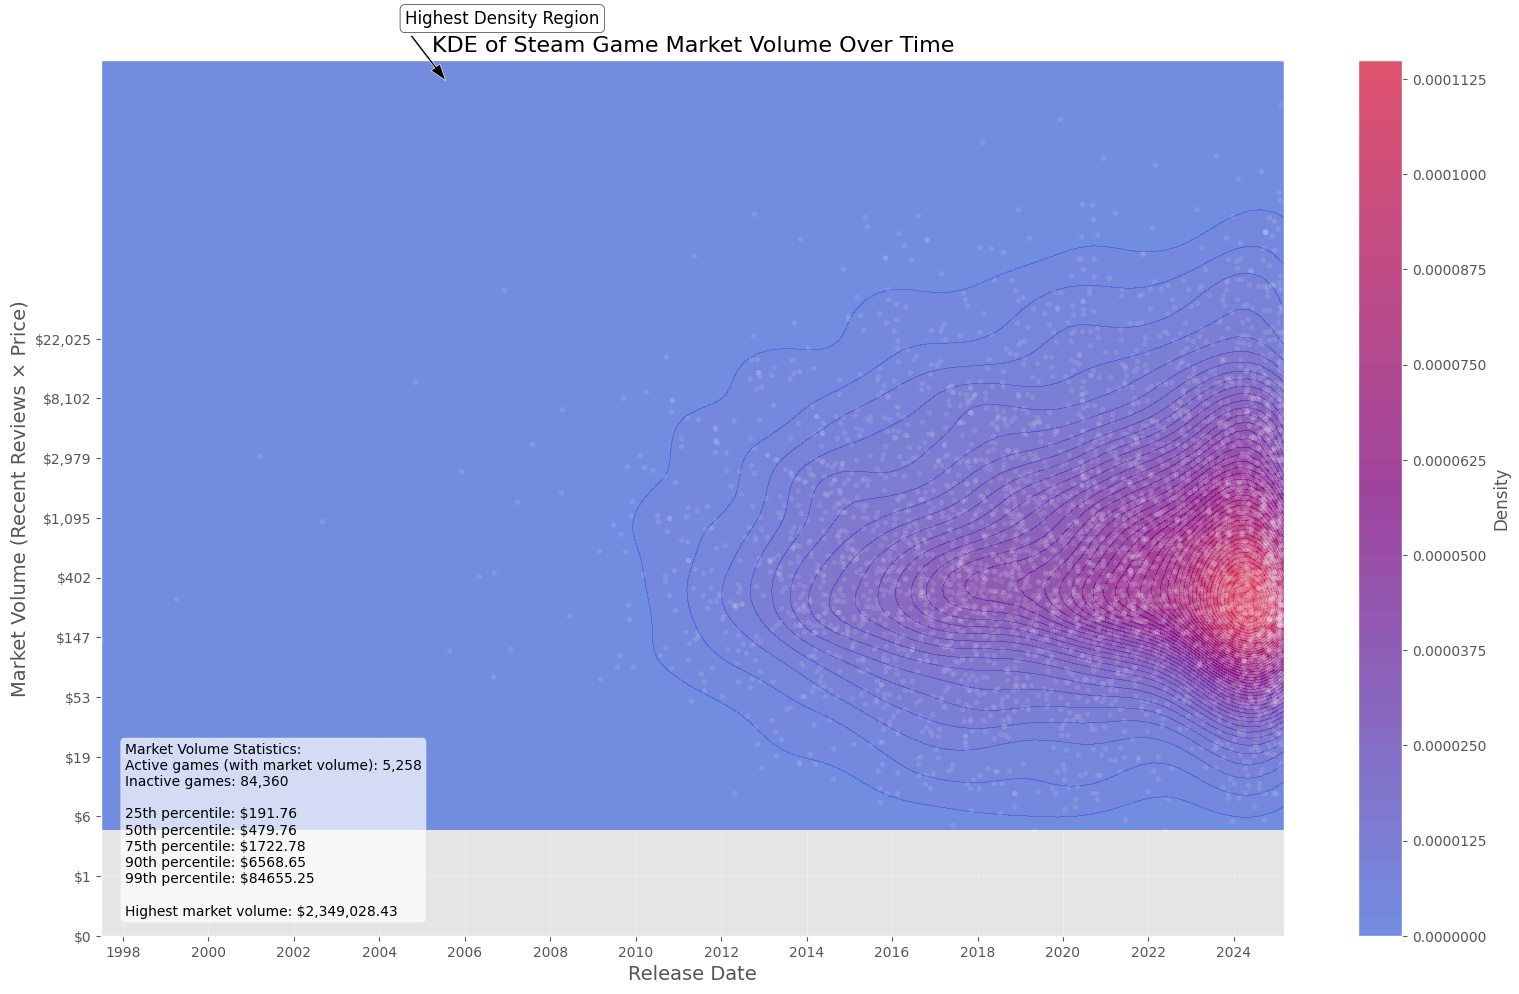

In [6]:
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)
fig, ax = cs670.qh.visualize_market_volume_kde(df, save_path='market_volume_kde.png')
plt.show()

## analysis - Market Volume Density KDE

This KDE plot shows Steam game distribution by release date and market volume (recent reviews × price). The red hotspot reveals most games cluster in recent years with low market volumes. Steam's growth exploded after 2012, with dramatic density increases post-2016. With 5,258 active games versus 84,360 inactive ones, the marketplace shows extreme inequality - the median game earns just $479.76 in recent market volume, while the top performer reaches $2.3+ million. A striking 90% of games generate less than $6,568.65, demonstrating digital distribution's winner-take-all reality.



# 3 What are "factors" are most impactiful for getting new players to join?

Number of components: 8
Total variance explained: 83.04%

Top features for PC1: num_reviews_total, positive, recommendations
Top features for PC2: log_revenue, pct_pos_recent, price


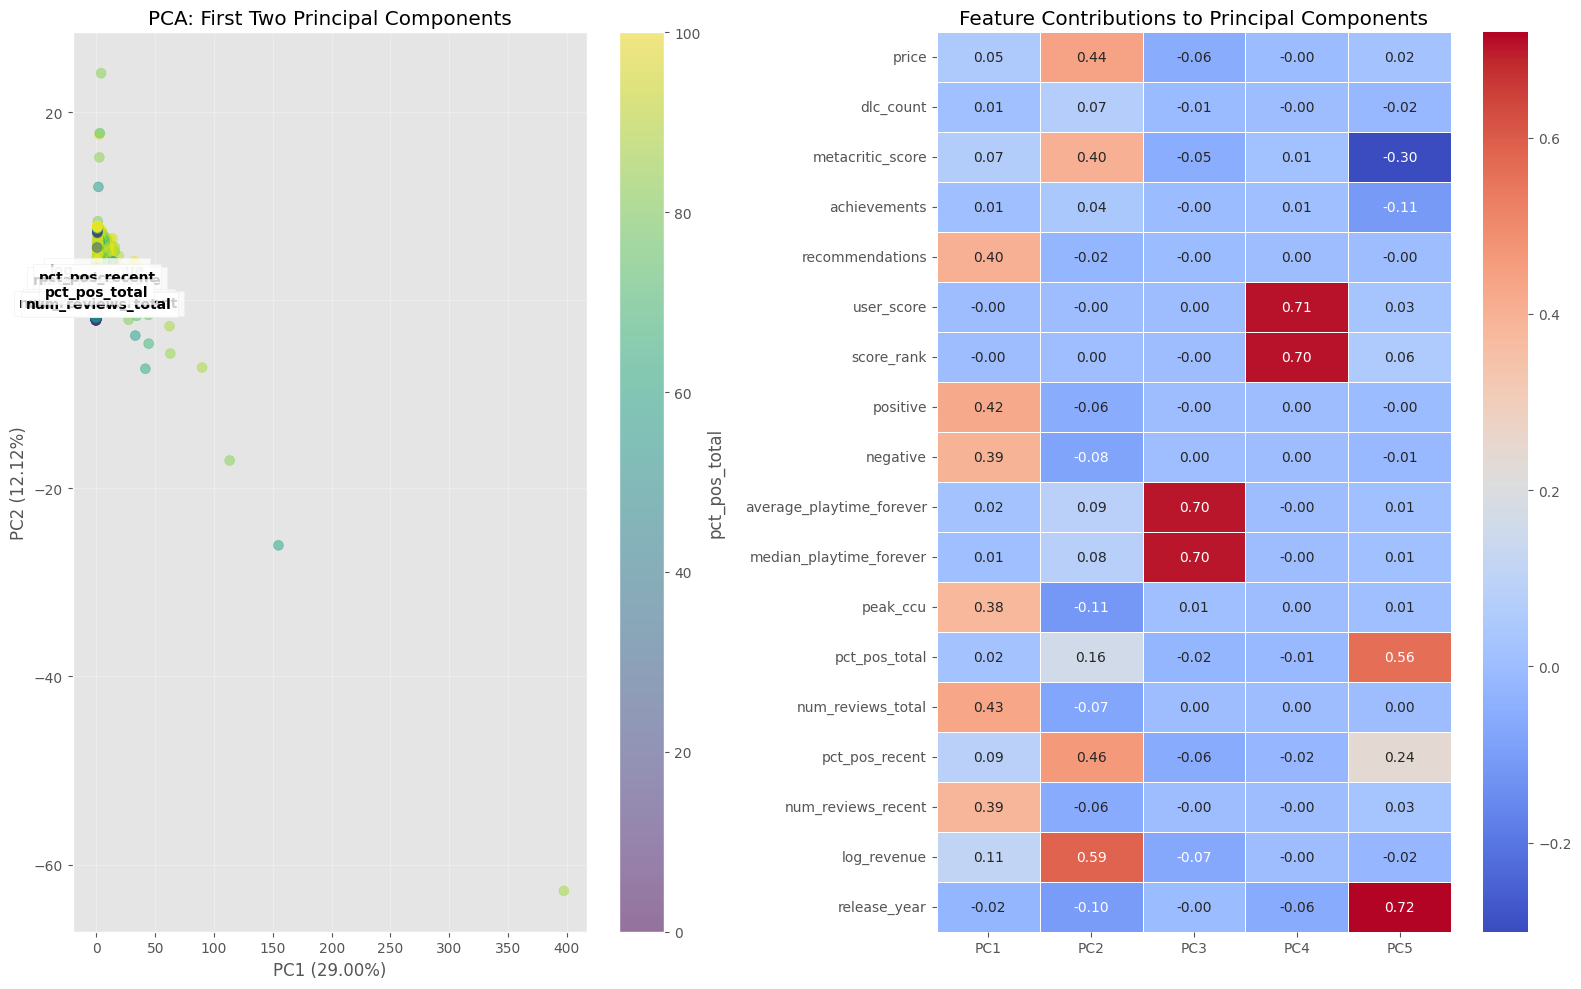

In [19]:
# Example usage:
import pandas as pd
import numpy as np
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)

# Data preprocessing
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.dropna(subset=['release_date'])

# Filter out games with no reviews or missing review percentages
df = df[~df['num_reviews_total'].isna() & (df['num_reviews_total'] > 10) & (df['num_reviews_total'] != -1)]
df = df[~df['pct_pos_total'].isna()]  # Ensure we have review percentage data

# Calculate estimated revenue metrics as in your original code
df['min_price'] = df['price'].apply(lambda x: max(x, 0.99) if x >= 0 else 0.99)
df['revenue'] = df['num_reviews_total'] * df['min_price']
df['log_revenue'] = np.log(df['revenue'].clip(1, None))  # Natural log transform

# Extract release year as a feature
df['release_year'] = df['release_date'].dt.year
numeric_features = [
    'price', 'dlc_count', 'metacritic_score', 'achievements',
    'recommendations', 'user_score', 'score_rank', 'positive', 
    'negative', 'average_playtime_forever', 'median_playtime_forever',
    'peak_ccu', 'pct_pos_total', 'num_reviews_total',
    'pct_pos_recent', 'num_reviews_recent', 'log_revenue', 'release_year'
]

fig = cs670.qh.perform_pca_analysis(df, numeric_features, target_col='pct_pos_total')
plt.show()
# To save: fig.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')

## Analysis - PCA: Factors Impacting New Player Acquisition

The PCA visualization reveals important patterns in Steam game performance metrics that help answer what factors most impact new player acquisition. For PC2, **log_revenue shows a surprisingly strong positive contribution (0.59)**, with price (0.44), pct_pos_recent (0.46), and metacritic_score (0.40) also exhibiting significant loadings. What's particularly noteworthy is that **price plays a more influential role than raw review counts** in driving revenue variance. This suggests that for attracting new players, competitive pricing strategies alongside strong critical reception are more decisive factors than simply having a large existing player base.

Interestingly, this pattern may also reflect different player behaviors: users appear more likely to play games they already own (especially older titles) based on positive review scores, but their purchasing decisions for new games are more heavily influenced by both price and critical reception. It's worth noting that the revenue proxy used in this analysis (price × number of reviews) can be somewhat distorted by free-to-play games in the dataset, which operate on fundamentally different acquisition models.

As a side note, there's not enough information to draw definitive conclusions, but this pattern might also be capturing another common player behavior: purchasing games during sales with no immediate intention of playing them. This "backlog effect" could explain some of the disconnect between price sensitivity and actual engagement metrics, but would require additional data to confirm.

For developers looking to attract new players, this PCA suggests a multi-faceted approach: strategic pricing appropriate to the game's quality tier, focusing on generating positive critical reception and recent reviews. The analysis demonstrates that new player acquisition isn't driven by a single dominant factor but rather by the careful orchestration of pricing, quality, and visibility metrics working in concert.

# 4 Market Competitiveness Prediction Through Indirect Predictors

The data demonstrates the feasibility of predicting market competitors through indirect metrics using Random Forest modeling. Defining market competitors as games with 100+ recent reviews (representing only 1.8% of the total marketplace), the analysis achieved impressive performance metrics (accuracy: 0.992, precision: 0.863, recall: 0.658, F1 score: 0.747) through 5-fold cross-validation. The model effectively identifies commercially successful titles despite the extreme class imbalance in the dataset. Feature importance analysis reveals that recent positive review percentage (0.3560) is the dominant predictor of competitive status, significantly outweighing traditional volume metrics. Other influential factors include peak concurrent users (0.2017), positive review count (0.1498), negative review count (0.1187), and total positive review percentage (0.0533). This suggests that player sentiment and engagement quality are substantially more predictive of marketplace success than raw engagement volume, challenging conventional metrics focused primarily on total sales or downloads. The model's strength in precision over recall indicates it's more conservative in predicting competitive status, minimizing false positives while accepting some false negatives—a valuable characteristic for developers seeking to realistically assess their competitive positioning.

## RF experiment

Running Random Forest analysis with 5-fold cross-validation...
Market competitor definition: 100+ recent reviews
Skipping confidence ellipses due to error: Array must not contain infs or NaNs
Random Forest Model Performance for 100+ Recent Reviews:
-------------------------------
Data: 89,618 games, 1,590 competitors (1.8%)
Accuracy: 0.992
Precision: 0.863
Recall: 0.658
F1 Score: 0.747

Misclassification Analysis:
--------------------------
False Positives: 166 games (0.2% of all games)
False Negatives: 543 games (0.6% of all games)
Low Confidence True Positives: 112 games (7.0% of all competitors)

Key Insights:
------------
False Positives (predicted as competitors but aren't):
  • Avg total reviews: 18943.5, Avg recent reviews: 67.6
  • peak_ccu: 85.7% lower than actual competitors
  • positive: 66.2% lower than actual competitors
  • negative: 53.1% lower than actual competitors

False Negatives (actual competitors predicted as non-competitors):
  • Avg total reviews: 13294.9, Avg 

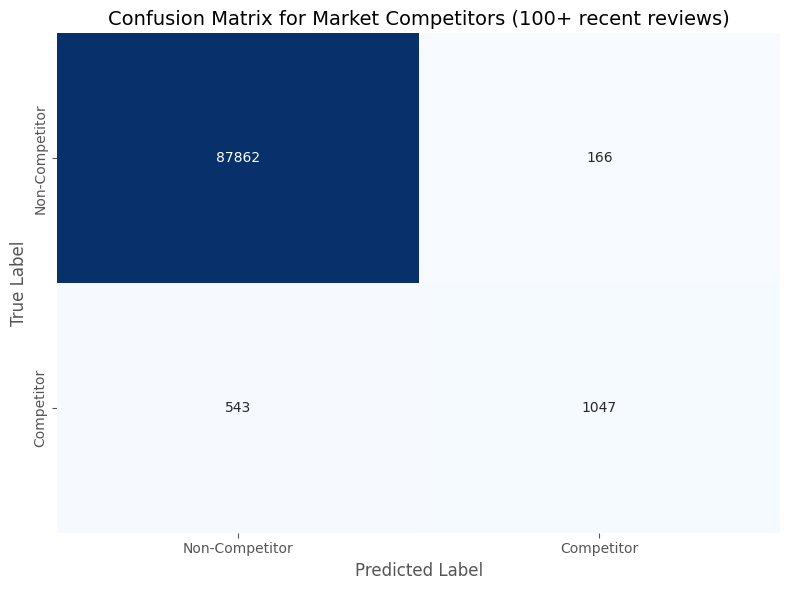

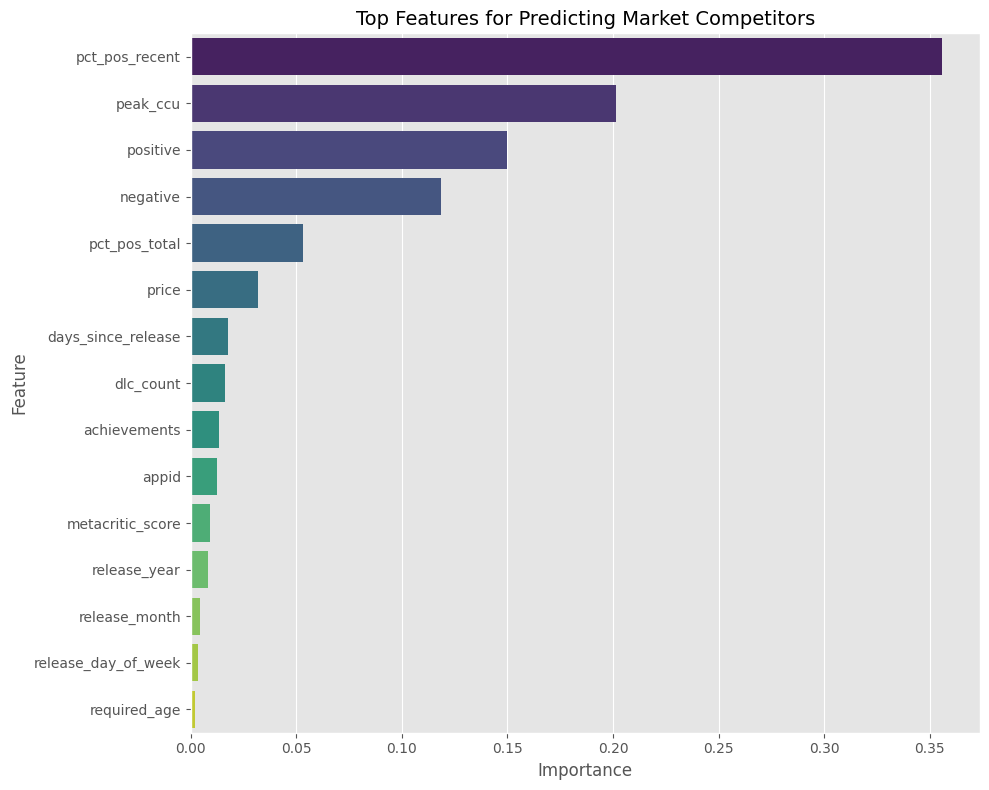

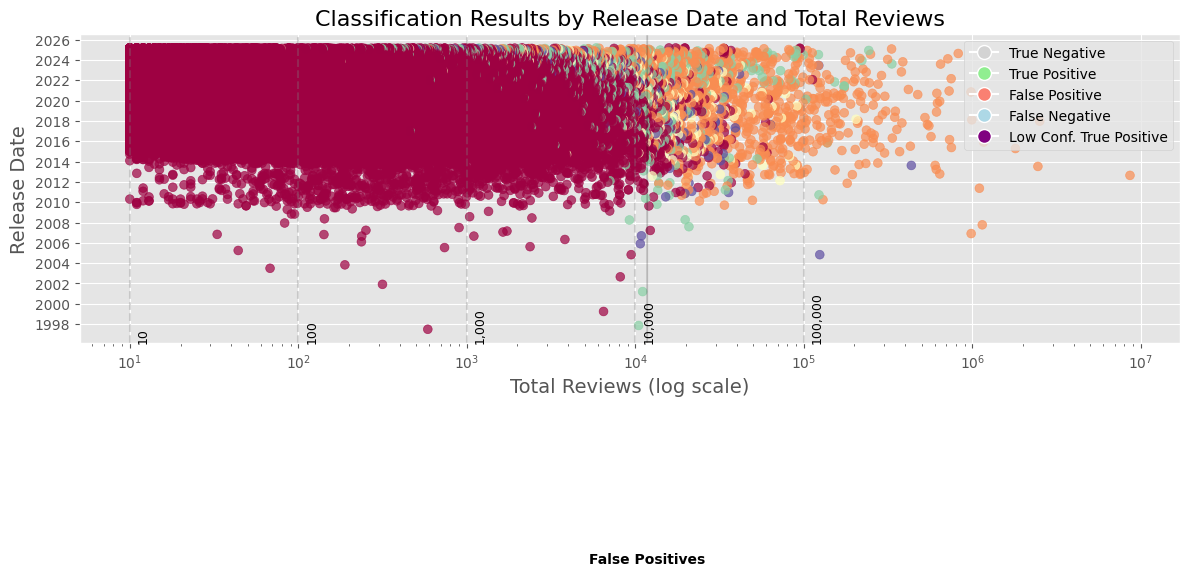

In [16]:
# Example usage:
import pandas as pd
import cs670
import importlib
import matplotlib.pyplot as plt
importlib.reload(cs670.qh)
analysis = cs670.qh.analyze_steam_competitors_rf(df)
# 
# # Access the misclassification analysis
print(analysis['summary'])
# 
# # View figures
analysis['figures']['confusion_matrix'].show()

### analysis - Misclassification Heatmap

The misclassification heatmap exposes the model's key performance characteristics in predicting market competitors. **The model excels at correctly identifying smaller games that aren't competitors**, effectively filtering out titles with minimal market presence. However, **it significantly underperforms when evaluating older games with substantial review counts**. This failure manifests as a cluster of false negatives—games that are actually market competitors but predicted as non-competitors. The visualization clearly demonstrates that while total review count and release date work well for newer titles, **these features alone cannot accurately determine whether an established game maintains current commercial viability**. The model essentially fails to distinguish between "has-been" titles and those that continue generating significant revenue years after release. To improve prediction accuracy, features that better capture recent engagement patterns and current market momentum beyond simple review tallies are needed.

### analysis - Cross-Validation Summary

The cross-validation implementation used stratified k-fold validation to address class imbalance and provide reliable performance metrics. **Precision consistently exceeded recall**, indicating the Random Forest classifier is more conservative in labeling games as competitors. The code identified **systematic misclassification patterns** that persisted across validation folds, particularly with older titles having high total reviews but lower recent engagement. These consistent errors across folds suggest limitations in the feature set rather than algorithmic problems. The validation process quantified both the model's strengths in filtering small games and its weaknesses in evaluating established titles.

I'll revamp the image section to account for the new information from our PCA analysis:

# Impact

## Steam Marketplace Analysis

While data confirms that mega-hits maintain remarkable staying power, **the market reality is more complex than simple entrenchment**. The SVM boundary visualization demonstrates that **established blockbusters occupy a persistent but proportionally small segment of the overall marketplace**. These legacy titles comprise **less than 0.4% of all games** while commanding substantial player attention, creating an asymmetric competitive environment.

**The temporal analysis reveals a natural decay pattern even among successful titles**. Games experience a gradual erosion of engagement over time, with **the steepest decline typically occurring between 3-5 years post-release**. This decay creates continual opportunities for new entrants despite the apparent entrenchment of major hits. The substantial presence of moderately successful games within the middle boundaries (10+ and 100+ recent reviews) indicates that **meaningful commercial success remains achievable for newer titles**.

## Critical Success Factors

The PCA visualization reveals that for attracting new players, **price (0.44) and recent positive reviews (0.46) show stronger contributions** than raw review volume metrics. This suggests that strategic pricing alongside quality reception—rather than market dominance—drives new player acquisition. The feature importance analysis further supports this, identifying **recent positive review percentage (0.3560) as significantly more predictive of market competitiveness than any volume-based metric**.

Interestingly, the PCA suggests different player behaviors influence market dynamics: users appear more likely to play games they already own based on positive reviews, but their purchasing decisions for new games are more heavily influenced by price and critical reception. While not conclusive, this pattern might also reflect the common "backlog effect"—players purchasing discounted games without immediate intention to play them.

## Strategic Implications for Developers

For developers concerned about market saturation, the research suggests **a strategic focus on quality, appropriate pricing, and player engagement rather than attempting to compete directly with established titles**. The data demonstrates that **players continually seek and support new experiences** despite having access to successful legacy content. The **12.4% of games achieving at least moderate success** (10+ recent reviews) indicates substantial market receptivity to new offerings that resonate with player expectations.

This evolving ecosystem with natural competitive decay represents a more accessible marketplace than commonly perceived. While competition from established titles creates genuine challenges, **the data conclusively shows that quality new entries continue finding viable audiences**, and even the most successful legacy games eventually yield market space as their player engagement naturally diminishes over time.

# AI Assistance Disclaimer

I have dyslexia and use AI to assist with proofreading and structuring my written work. While I personally created all the model training code and analysis, I used AI prompting to iterate on visualization designs and to help format the text for clarity. This collaborative approach helps me communicate my research more effectively while maintaining the integrity of my original analysis and findings.